In [3]:
import os
os.getcwd()

'C:\\Users\\91967'

In [4]:
os.chdir("C:\Jupyter notebook")

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
data= pd.read_csv("HepatitisCdata.csv")

In [7]:
data.head(100)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0=Blood Donor,40,m,45.0,74.2,20.9,29.1,12.0,9.10,6.29,92.0,24.1,74.1
96,97,0=Blood Donor,40,m,39.1,66.5,33.3,32.9,14.8,7.87,4.91,88.0,18.5,68.8
97,98,0=Blood Donor,40,m,45.1,63.4,39.6,31.4,19.7,11.31,4.74,91.0,18.2,81.1
98,99,0=Blood Donor,40,m,45.4,52.9,41.3,26.2,10.6,10.27,6.85,82.0,40.2,76.6


# Cleaning data

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)  

Column "unamed" have been removed as its unwanted

In [9]:
data.replace(to_replace=['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'],
             value=['0','1','2','3','4'],inplace=True)

In [10]:
data['Category'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [11]:
data.replace(to_replace=['m','f'],
             value=['0','1'],inplace=True)

          The following have been replaced for convinenece
          0=Blood Donor               Category column
          1=suspect Blood Donor
          2=Hepatitis
          3=Fibrosis
          4=Cirrhosis
          ------------------------------------------------
          0=m(Male)                   sex column
          1=f(Female)

In [12]:
data.head(600)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4,56,0,27.0,81.1,17.0,319.8,37.0,1.42,3.54,66.9,93.7,65.3
596,4,56,0,23.0,105.6,5.1,123.0,43.0,1.80,2.40,62.7,35.9,62.8
597,4,56,0,30.0,40.4,0.9,80.3,119.0,1.88,1.43,79.3,17.6,54.2
598,4,58,0,31.0,143.1,7.0,181.8,58.0,3.29,3.92,66.4,273.7,78.1


# EDA

<IPython.core.display.Javascript object>


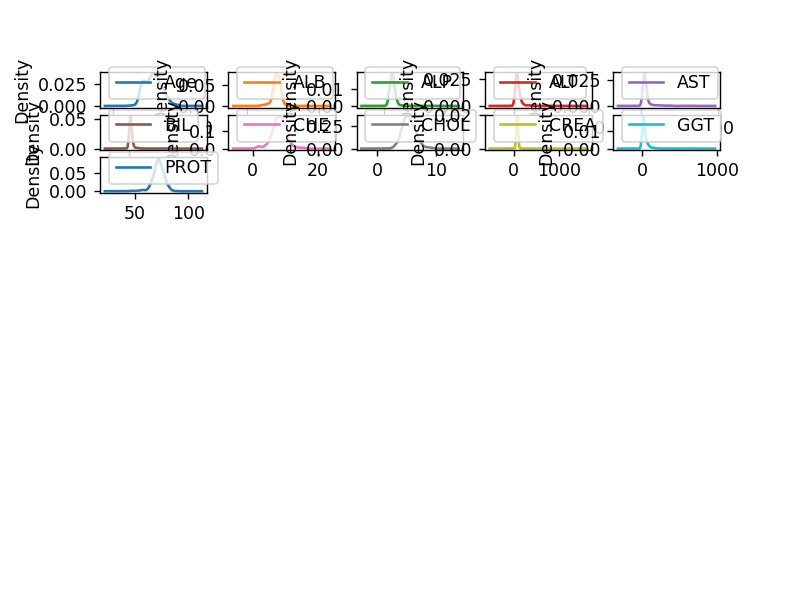

In [13]:
data.plot(kind='density',subplots=True,layout=(11,5),sharex=False)
plt.show()

In [14]:
data.corr()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
ALB,-0.197498,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.173340,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,-0.006021,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.088666,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.032492,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.075093,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,0.125641,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
CREA,-0.022296,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704
GGT,0.153087,-0.155749,0.454630,0.248114,0.491263,0.217024,-0.110345,-0.006895,0.121003,1.000000,-0.011767


In [15]:
from pandas.plotting import scatter_matrix

<IPython.core.display.Javascript object>


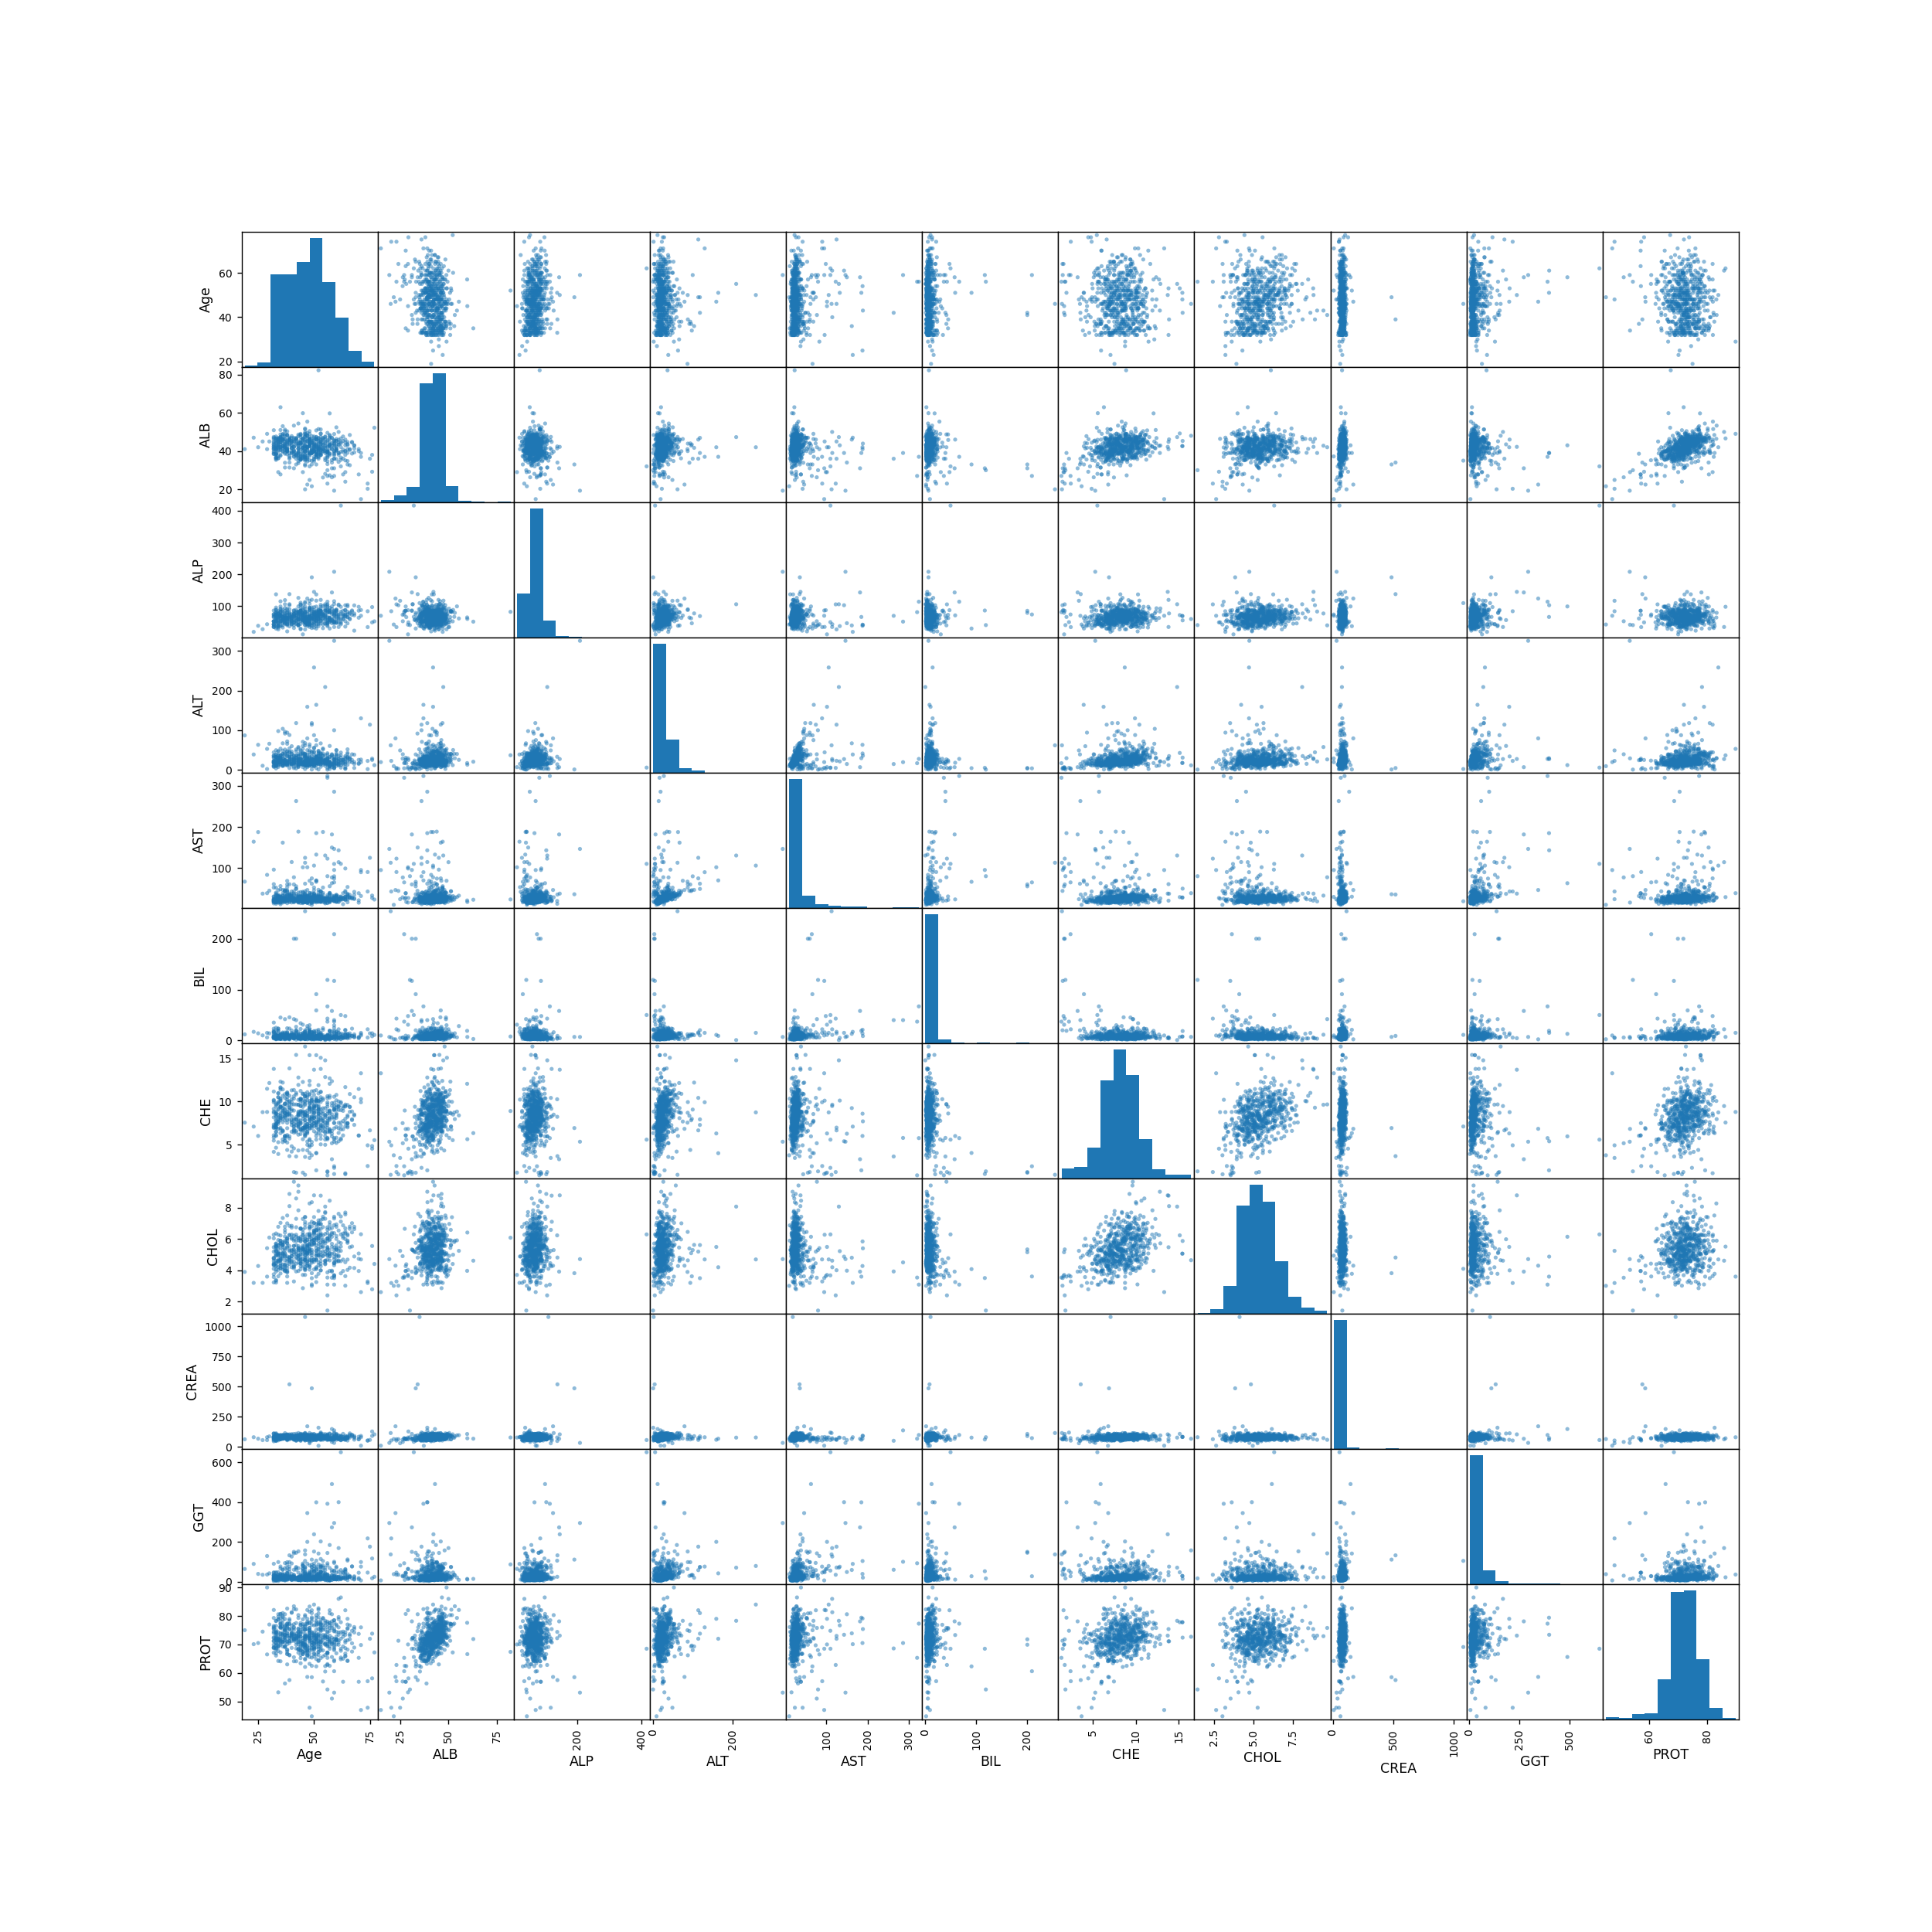

In [17]:
scatter_matrix(data,figsize=(20,20))
plt.show()

In [18]:
correlations=data.corr()

<IPython.core.display.Javascript object>


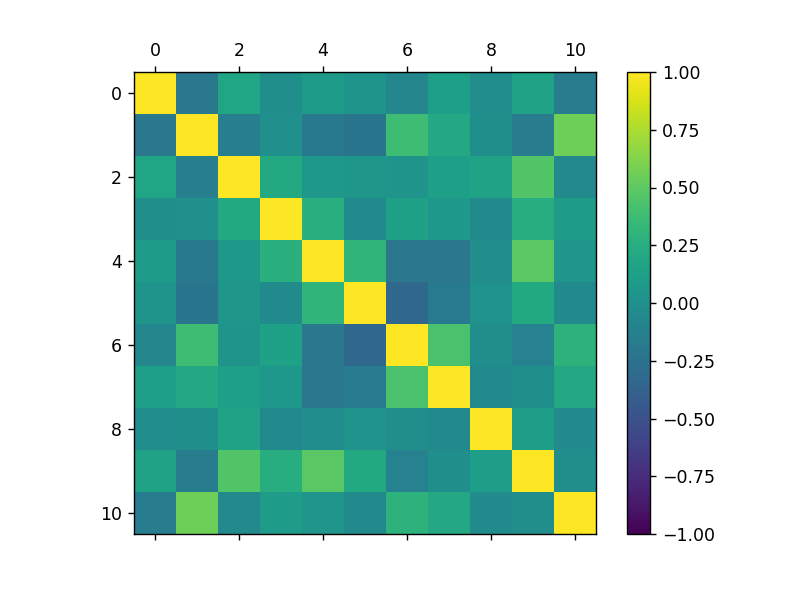

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
plt.show()

<IPython.core.display.Javascript object>


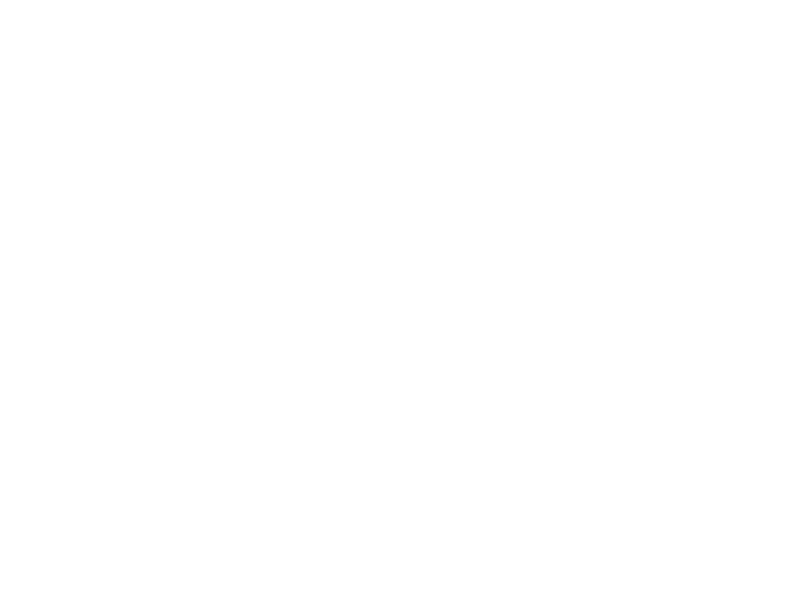

<IPython.core.display.Javascript object>


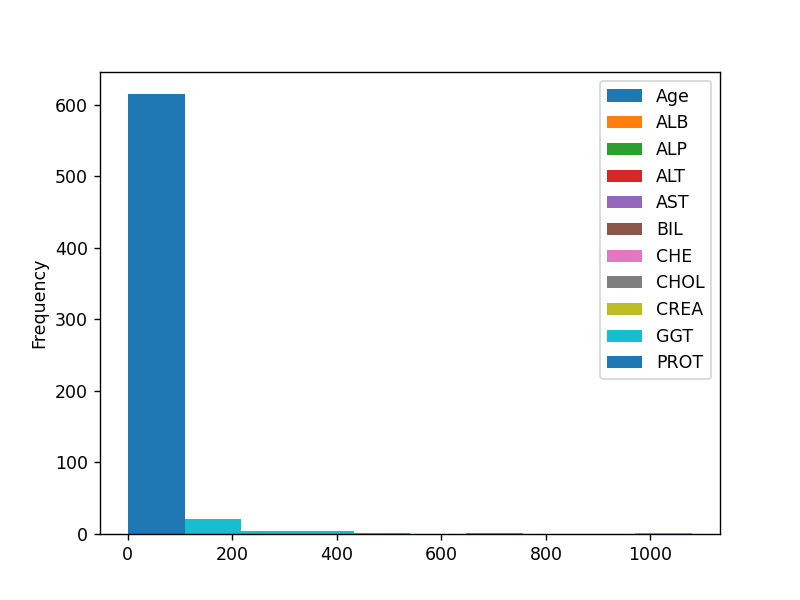

In [80]:
plt.figure()
data.plot(kind='hist')


<IPython.core.display.Javascript object>


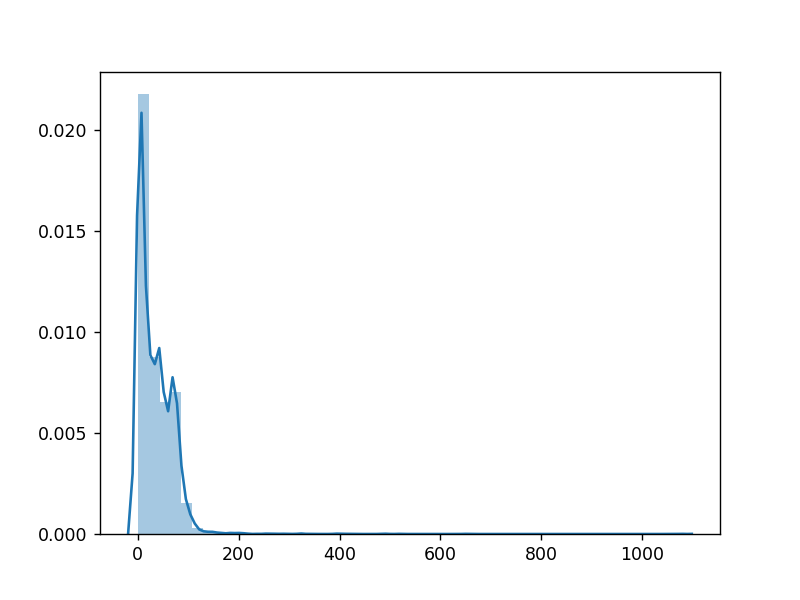

In [81]:
plt.figure()
sns.distplot(data)

<IPython.core.display.Javascript object>


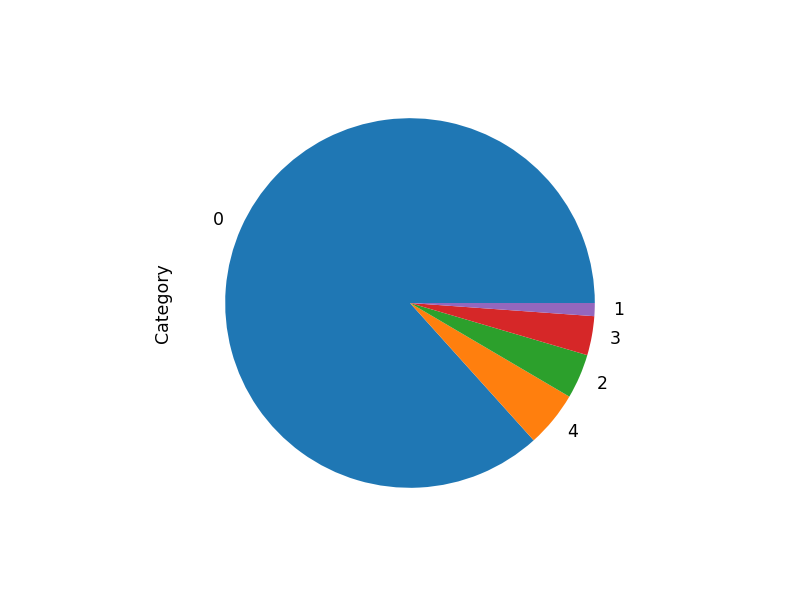

In [95]:
plt.figure()
data.Category.value_counts().plot(kind='pie')

<IPython.core.display.Javascript object>


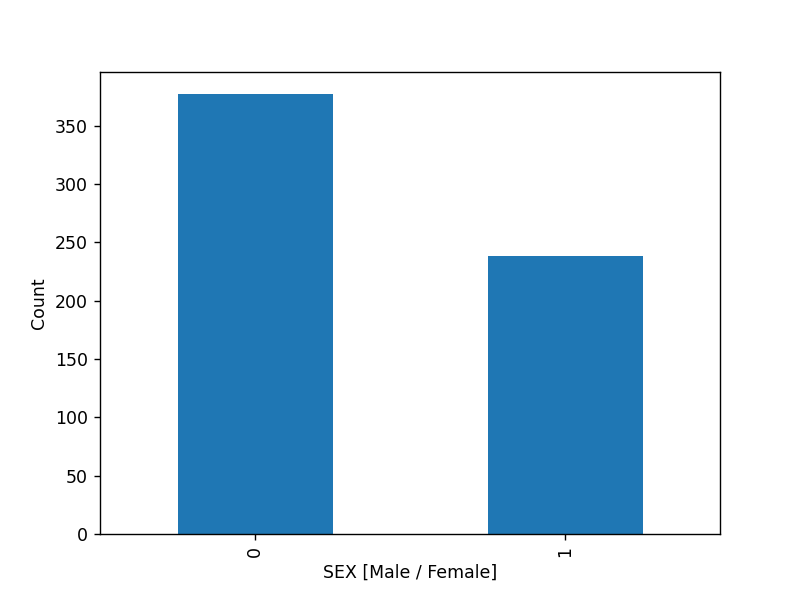

In [102]:
plt.figure()
data.Sex.value_counts().plot(kind='bar')
plt.xlabel("SEX [Male / Female]")
plt.ylabel("Count")
plt.show()


# Null value checking and replacement

In [21]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [23]:
data.shape

(615, 13)

we have only 31 null values in the dataset given so we can use mode method to replace the null vaalues in
"ALB","ALP","ALT","CHOL" & "PROT" columns

In [24]:
data['ALP'].replace(np.NaN,data['ALP'].mode()[0],inplace=True)

In [25]:
data['PROT'].replace(np.NaN,data['PROT'].mode()[0],inplace=True)

In [26]:
data['CHOL'].replace(np.NaN,data['CHOL'].mode()[0],inplace=True)

In [27]:
data['ALT'].replace(np.NaN,data['ALT'].mode()[0],inplace=True)

In [28]:
data['ALB'].replace(np.NaN,data['ALB'].mode()[0],inplace=True)

In [30]:
data.isnull().sum() #null values have been replaced

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

# Building a Prediction Model

In [31]:
x=data.drop(columns='Category',axis=1)
y=data['Category']

In [32]:
x # we will predict category using these attributes

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,1,33.0,52.5,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [33]:
y  # we are going to predict the category 

0      0
1      0
2      0
3      0
4      0
      ..
610    4
611    4
612    4
613    4
614    4
Name: Category, Length: 615, dtype: object

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=2)

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(615, 12) (492, 12) (123, 12)


In [36]:
model= LogisticRegression()

In [37]:
model.fit(x_train, y_train)

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
x_train_prediction= model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [39]:
print('Accuracy on training data',training_data_accuracy)

Accuracy on training data 0.9552845528455285


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=10)
from sklearn.model_selection import cross_val_score
knn_score=[]
for k in range(1,21):
    knn_classifier =KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_score.append(score.mean())

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\91967\anaconda3\lib\site-packag

In [47]:
score=cross_val_score(randomforest_classifier,x,y,cv=10)
score.mean()

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.9267583289264939

In [55]:
knn_classifier =KNeighborsClassifier (n_neighbors=12)
score2=cross_val_score(knn_classifier,x,y,cv=10)
score2.mean()

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.8926493918561608